# Pandas Examples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from utils import parsing
import nltk


In [2]:
filename = './data/star_wars_dialogue.pkl'
df = pd.read_pickle(filename)

print(f'Shape: {df.shape}')

df.head()

Shape: (4986, 3)


,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
2,THREEPIO,We're doomed!,A New Hope
3,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
4,THREEPIO,What's that?,A New Hope
5,THREEPIO,I should have known better than to trust the l...,A New Hope


## Matplotlib and Seaborn

### Horizontal Barplot

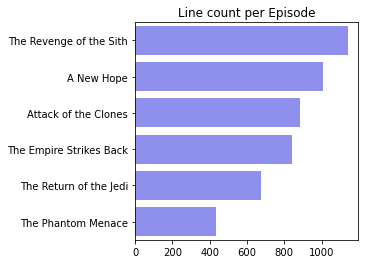

In [3]:
character_series = df['episode'].value_counts()
plt.figure(figsize=(4, 4))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='blue', alpha=0.5)

ax.set_title(f'Line count per Episode')
plt.show()

### Horizontal Barplots with values

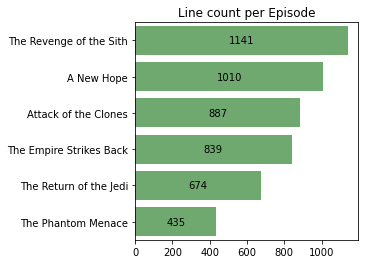

In [11]:
character_series = df['episode'].value_counts()
plt.figure(figsize=(4, 4))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='green',
                 alpha=0.6)
for p in ax.patches:
    annotation_value =format(p.get_width(), '.0f')
    x_pos = (p.get_x() + p.get_width())/2.
    y_pos =  p.get_y() + p.get_height()/2.
    ax.annotate(annotation_value, 
                (x_pos, y_pos), ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')
ax.set_title(f'Line count per Episode')
plt.show()

### Histograms

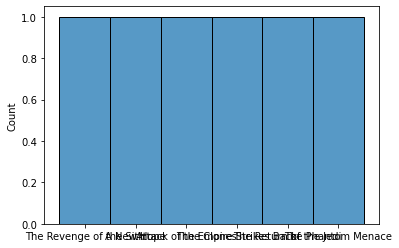

In [20]:
ax = sns.histplot( x=character_series.index)
plt.show()

## Dataframe

### List columns

In [22]:
columns = list(df.columns)
print(columns)

['character', 'dialogue', 'episode']


### Change Column Order

In [23]:
df = df.reindex(columns=['episode', 'character', 'dialogue', ])

df.head()

,episode,character,dialogue
1,A New Hope,THREEPIO,Did you hear that? They've shut down the main...
2,A New Hope,THREEPIO,We're doomed!
3,A New Hope,THREEPIO,There'll be no escape for the Princess this time.
4,A New Hope,THREEPIO,What's that?
5,A New Hope,THREEPIO,I should have known better than to trust the l...


### Using df.apply()

In [24]:
def simple_word_count(text):
    word_list = text.split(' ')
    return len(word_list)

df['word_count'] = df['dialogue'].apply(simple_word_count)

df.head()

,episode,character,dialogue,word_count
1,A New Hope,THREEPIO,Did you hear that? They've shut down the main...,21
2,A New Hope,THREEPIO,We're doomed!,2
3,A New Hope,THREEPIO,There'll be no escape for the Princess this time.,9
4,A New Hope,THREEPIO,What's that?,2
5,A New Hope,THREEPIO,I should have known better than to trust the l...,16


### Histogram

In [25]:
df['word_count'].describe()

count    4986.000000
mean       10.949458
std        10.534266
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max       135.000000
Name: word_count, dtype: float64

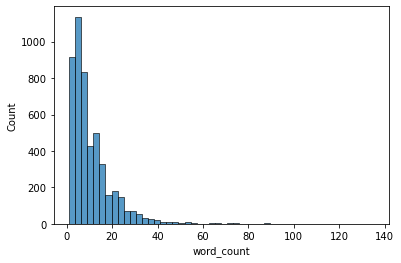

In [29]:
ax = sns.histplot(data=df, x="word_count", bins=50)